In [16]:
import pandas as pd

# 예시 데이터프레임
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 20, 30, 40, 50, 60]
})

# Category 열을 기준으로 그룹화하고, 각 그룹의 Value 합계 계산
grouped = df.groupby('Category')['Value'].sum()
print(grouped)


Category
A     90
B    120
Name: Value, dtype: int64


In [17]:
import pandas as pd

# 예시 데이터프레임
df = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02'],
    'Category': ['A', 'B', 'A', 'B'],
    'Value': [10, 20, 30, 40]
})

# Date 열을 인덱스로, Category를 열로, Value를 값으로 변환
pivoted = df.pivot(index='Date', columns='Category', values='Value')
print(pivoted)


Category     A   B
Date              
2021-01-01  10  20
2021-01-02  30  40


In [19]:
import pandas as pd
import numpy as np

# 임의의 데이터 생성
np.random.seed(42)

# 200개의 샘플을 생성
data = {
    'ID': range(1, 201),
    'Age': np.random.randint(18, 70, 200),
    'Salary': np.random.randint(30000, 120000, 200),
    'JoinDate': pd.to_datetime(np.random.choice(pd.date_range('2010-01-01', '2024-01-01', freq='D'), 200)),
    'Department': np.random.choice(['HR', 'Engineering', 'Marketing', 'Sales'], 200)
}

df = pd.DataFrame(data)

# 예시 데이터 출력
print(df.head())


   ID  Age  Salary   JoinDate   Department
0   1   56   88053 2020-07-14        Sales
1   2   69   51959 2022-04-23           HR
2   3   46   35530 2017-05-25           HR
3   4   32   33748 2012-08-29  Engineering
4   5   60   43545 2013-03-12        Sales


In [23]:
# 부서별 평균 Salary와 Age 계산
df_grouped = df.groupby('Department').agg({'Salary': 'mean', 'Age': 'mean'}).reset_index()

df_grouped['Age'] = df_grouped['Age'].astype(int).apply(lambda x: f'{x:,}')
df_grouped['Salary'] = df_grouped['Salary'].astype(int).apply(lambda x: f'{x:,}')

# 그룹화 결과 출력
print(df_grouped)


    Department  Salary Age
0  Engineering  69,940  39
1           HR  74,215  46
2    Marketing  78,425  43
3        Sales  70,936  41


In [3]:
# 나이대 생성 (20대, 30대, 40대, ...)
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 29, 39, 49, 59, 70], labels=['20s', '30s', '40s', '50s', '60s'])

# 부서별, 나이대별 평균 Salary 계산
df_grouped_age = df.groupby(['Department', 'AgeGroup']).agg({'Salary': 'mean'}).reset_index()

# 결과 출력
print(df_grouped_age)


     Department AgeGroup        Salary
0   Engineering      20s  82927.777778
1   Engineering      30s  54684.000000
2   Engineering      40s  77273.777778
3   Engineering      50s  64838.666667
4   Engineering      60s  58671.750000
5            HR      20s  93663.181818
6            HR      30s  71029.375000
7            HR      40s  68392.357143
8            HR      50s  69270.375000
9            HR      60s  74467.823529
10    Marketing      20s  78948.250000
11    Marketing      30s  77102.750000
12    Marketing      40s  78859.000000
13    Marketing      50s  77060.555556
14    Marketing      60s  80412.857143
15        Sales      20s  80436.916667
16        Sales      30s  87935.111111
17        Sales      40s  56644.666667
18        Sales      50s  56206.625000
19        Sales      60s  68368.250000


/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_9831/1421153583.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_age = df.groupby(['Department', 'AgeGroup']).agg({'Salary': 'mean'}).reset_index()


In [5]:
# 부서별 평균 Salary 계산 (피벗)
df_pivot = df.pivot_table(values='Salary', index='Department', aggfunc='mean').astype(int)

# 피벗 결과 출력
print(df_pivot)


             Salary
Department         
Engineering   69940
HR            74215
Marketing     78425
Sales         70936


In [7]:
# 부서별, 나이대별 평균 Salary 계산 (피벗)
df_pivot_age = df.pivot_table(values='Salary', index='Department', columns='AgeGroup', aggfunc='mean').astype(int)

# 피벗 결과 출력
print(df_pivot_age)


AgeGroup       20s    30s    40s    50s    60s
Department                                    
Engineering  82927  54684  77273  64838  58671
HR           93663  71029  68392  69270  74467
Marketing    78948  77102  78859  77060  80412
Sales        80436  87935  56644  56206  68368


/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_9831/2035737855.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot_age = df.pivot_table(values='Salary', index='Department', columns='AgeGroup', aggfunc='mean').astype(int)


In [11]:
# 부서별 평균 연봉이 60,000 이상인 부서만 선택
df_filtered = df_grouped[df_grouped['Salary'] >= 60000]

# 결과 출력
print(df_filtered)


    Department        Salary        Age
0  Engineering  69940.930233  39.930233
1           HR  74215.632353  46.632353
2    Marketing  78425.395349  43.534884
3        Sales  70936.086957  41.847826


In [12]:
# 30대 이상이고, Salary가 50,000 이상인 데이터 선택
df_filtered_age = df[(df['Age'] >= 30) & (df['Salary'] >= 50000)]

# 결과 출력
print(df_filtered_age)


      ID  Age  Salary   JoinDate   Department AgeGroup
0      1   56   88053 2020-07-14        Sales      50s
1      2   69   51959 2022-04-23           HR      60s
6      7   38   64766 2017-08-06    Marketing      30s
7      8   56  103530 2015-06-06    Marketing      50s
8      9   36   91087 2012-05-03           HR      30s
..   ...  ...     ...        ...          ...      ...
191  192   56   80993 2014-03-23           HR      50s
192  193   50   59592 2013-04-06  Engineering      50s
195  196   69  118891 2013-05-02           HR      60s
196  197   30  117545 2014-03-21    Marketing      30s
197  198   58  119912 2018-11-11           HR      50s

[110 rows x 6 columns]


In [13]:
# 나이대가 30대 이상인 직원들만 선택 (피벗 테이블 결과에서)
df_pivot_age_filtered = df_pivot_age[['30s', '40s', '50s']]

# 결과 출력
print(df_pivot_age_filtered)


AgeGroup       30s    40s    50s
Department                      
Engineering  54684  77273  64838
HR           71029  68392  69270
Marketing    77102  78859  77060
Sales        87935  56644  56206


In [14]:
# 부서별 평균 Salary가 60,000 이상이고, 나이대가 30대 이상인 부서만 선택
df_filtered_complex = df_grouped_age[(df_grouped_age['Salary'] >= 60000) & (df_grouped_age['AgeGroup'].isin(['30s', '40s', '50s']))]

# 결과 출력
print(df_filtered_complex)


     Department AgeGroup        Salary
2   Engineering      40s  77273.777778
3   Engineering      50s  64838.666667
6            HR      30s  71029.375000
7            HR      40s  68392.357143
8            HR      50s  69270.375000
11    Marketing      30s  77102.750000
12    Marketing      40s  78859.000000
13    Marketing      50s  77060.555556
16        Sales      30s  87935.111111


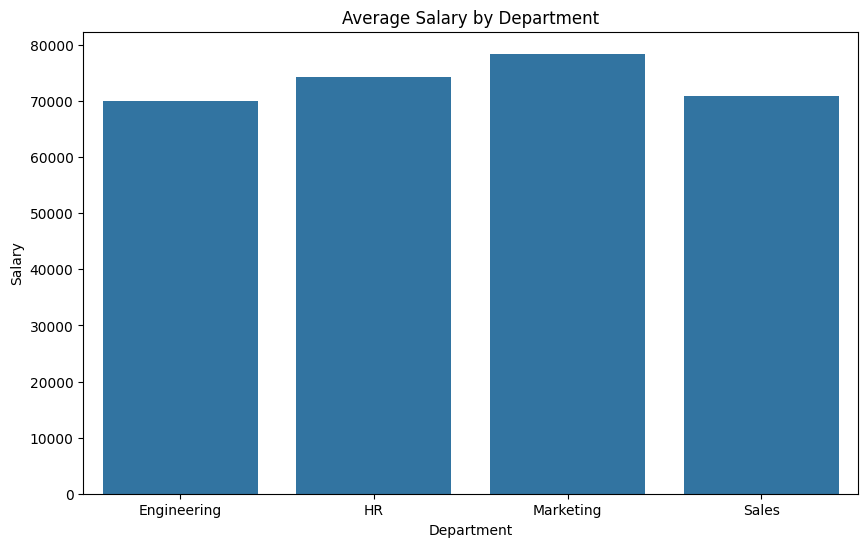

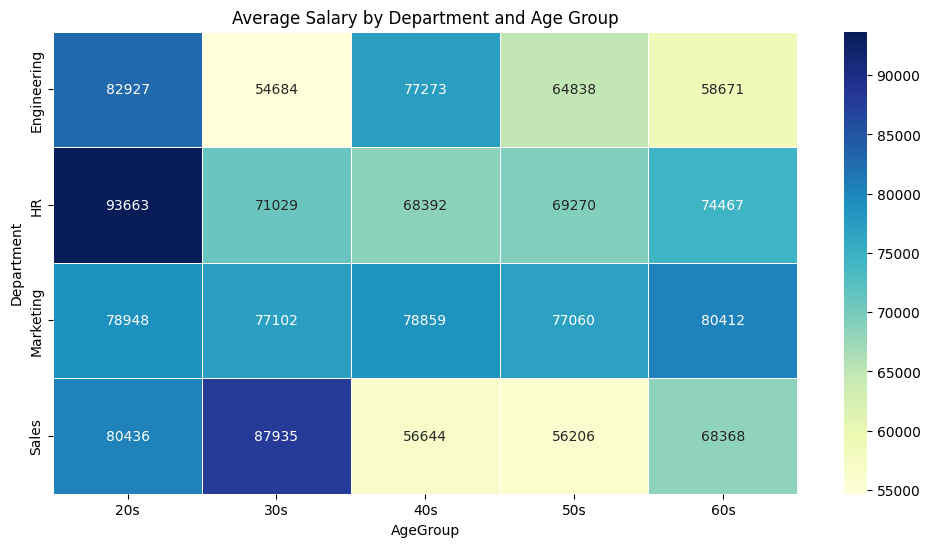

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 부서별 평균 Salary를 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Salary', data=df_grouped)
plt.title('Average Salary by Department')
plt.show()

# 부서별, 나이대별 평균 연봉 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot_age, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)
plt.title('Average Salary by Department and Age Group')
plt.show()
